In [3]:
# Common imports
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

HOUSING_TRAIN_DATA = "train.csv" 
HOUSING_TEST_DATA = "test.csv"
def load_housing_data(train_path=HOUSING_TRAIN_DATA, test_path=HOUSING_TEST_DATA):
    return pd.read_csv(train_path), pd.read_csv(test_path)

In [4]:
train_set, test_set = load_housing_data()

In [23]:
train_set.info()
train_set['KitchenQual'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [58]:
columns = ['SalePrice', 'LotArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'TotRmsAbvGrd', 'FullBath', 'HalfBath', 'BldgType', 'GrLivArea']
train_set_reduced = train_set[columns]

In [59]:
train_set_reduced.describe()

,SalePrice,LotArea,YearBuilt,OverallQual,OverallCond,TotRmsAbvGrd,FullBath,HalfBath,GrLivArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,1971.267808,6.099315,5.575342,6.517808,1.565068,0.382877,1515.463699
std,79442.502883,9981.264932,30.202904,1.382997,1.112799,1.625393,0.550916,0.502885,525.480383
min,34900.000000,1300.000000,1872.000000,1.000000,1.000000,2.000000,0.000000,0.000000,334.000000
25%,129975.000000,7553.500000,1954.000000,5.000000,5.000000,5.000000,1.000000,0.000000,1129.500000
50%,163000.000000,9478.500000,1973.000000,6.000000,5.000000,6.000000,2.000000,0.000000,1464.000000
75%,214000.000000,11601.500000,2000.000000,7.000000,6.000000,7.000000,2.000000,1.000000,1776.750000
max,755000.000000,215245.000000,2010.000000,10.000000,9.000000,14.000000,3.000000,2.000000,5642.000000


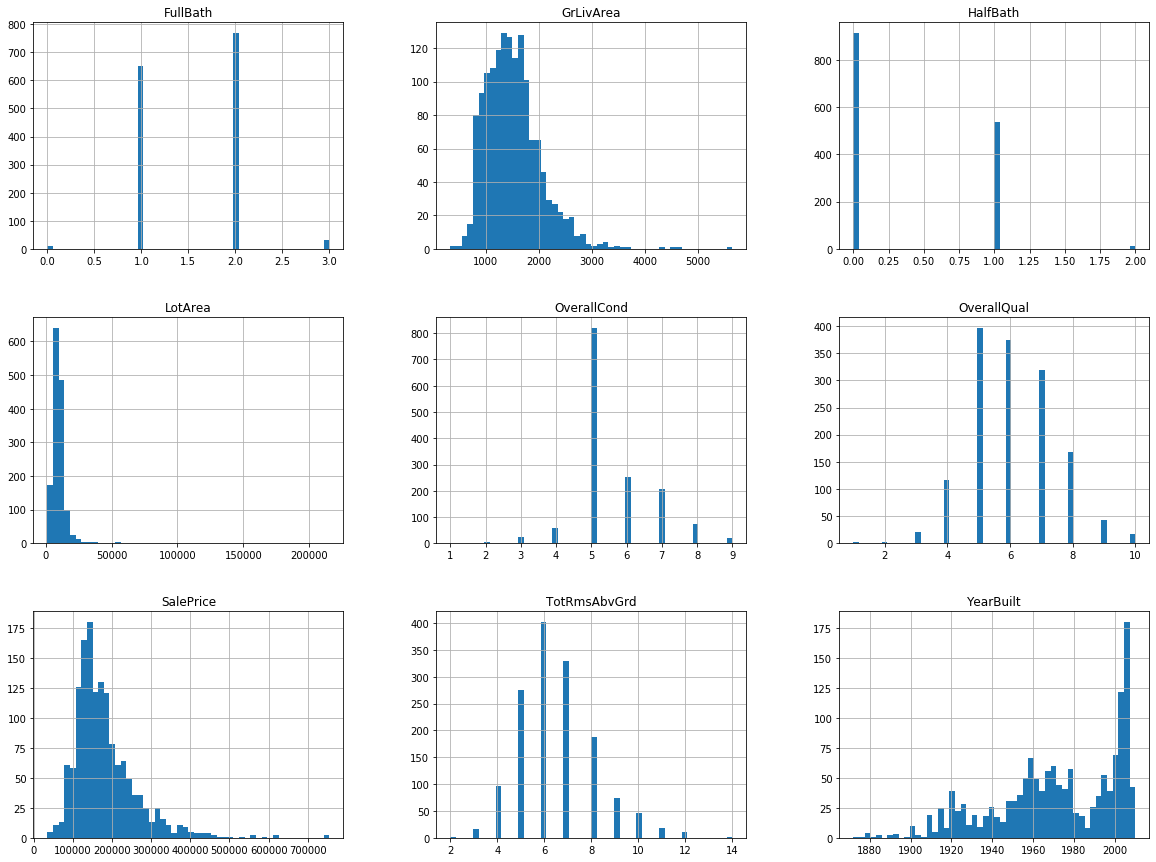

In [60]:
train_set_reduced.hist(bins=50, figsize=(20,15))
plt.show()

In [62]:
corr_matrix = train_set_reduced.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
HalfBath        0.284108
LotArea         0.263843
OverallCond    -0.077856
Name: SalePrice, dtype: float64

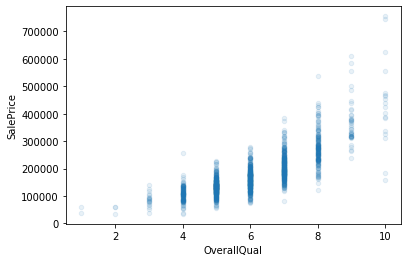

In [63]:
from pandas.plotting import scatter_matrix
train_set_reduced.plot(kind="scatter", x="OverallQual", y="SalePrice",alpha=0.1)

In [97]:
new_train_set = train_set_reduced.copy()
new_train_set['TotBath'] = new_train_set['HalfBath'] + new_train_set['FullBath'] #total bathrooms

In [98]:
corr_matrix = new_train_set.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
TotBath         0.568267
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
HalfBath        0.284108
LotArea         0.263843
OverallCond    -0.077856
Name: SalePrice, dtype: float64

In [99]:
train_set_X = new_train_set.drop('SalePrice',axis=1)
train_set_y = new_train_set["SalePrice"].copy()

In [100]:
train_set_X.describe()

,LotArea,YearBuilt,OverallQual,OverallCond,TotRmsAbvGrd,FullBath,HalfBath,GrLivArea,TotBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,6.099315,5.575342,6.517808,1.565068,0.382877,1515.463699,1.947945
std,9981.264932,30.202904,1.382997,1.112799,1.625393,0.550916,0.502885,525.480383,0.794965
min,1300.000000,1872.000000,1.000000,1.000000,2.000000,0.000000,0.000000,334.000000,0.000000
25%,7553.500000,1954.000000,5.000000,5.000000,5.000000,1.000000,0.000000,1129.500000,1.000000
50%,9478.500000,1973.000000,6.000000,5.000000,6.000000,2.000000,0.000000,1464.000000,2.000000
75%,11601.500000,2000.000000,7.000000,6.000000,7.000000,2.000000,1.000000,1776.750000,3.000000
max,215245.000000,2010.000000,10.000000,9.000000,14.000000,3.000000,2.000000,5642.000000,4.000000


In [101]:
train_set_X.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1460 non-null   int64 
 1   YearBuilt     1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   TotRmsAbvGrd  1460 non-null   int64 
 5   FullBath      1460 non-null   int64 
 6   HalfBath      1460 non-null   int64 
 7   BldgType      1460 non-null   object
 8   GrLivArea     1460 non-null   int64 
 9   TotBath       1460 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 114.2+ KB


In [102]:
train_set_X[train_set_X.isnull().any(axis=1)].head() #no non null values

,LotArea,YearBuilt,OverallQual,OverallCond,TotRmsAbvGrd,FullBath,HalfBath,BldgType,GrLivArea,TotBath


In [103]:
train_set_cat = train_set_X[['BldgType']]
train_set_num = train_set_X.drop("BldgType", axis=1)
train_set_cat.head(10)

,BldgType
0,1Fam
1,1Fam
2,1Fam
3,1Fam
4,1Fam
5,1Fam
6,1Fam
7,1Fam
8,1Fam
9,2fmCon


In [104]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
train_set_cat_1hot = cat_encoder.fit_transform(train_set_cat)
train_set_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [105]:
cat_encoder.categories_

[array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object)]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = list(train_set_num)
cat_attribs = ["BldgType"]

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

train_set_X_prepared = full_pipeline.fit_transform(train_set_X)

In [110]:
train_set_X_prepared.shape

(1460, 14)

In [111]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set_X_prepared, train_set_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
some_data = train_set_X.iloc[:5]
some_labels = train_set_y.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [225938.56535235 180406.64661107 233543.85061854 181850.6767062
 284612.75928399]


In [113]:
print("Labels:", list(some_labels))

Labels: [208500, 181500, 223500, 140000, 250000]


In [114]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(train_set_X_prepared)
lin_mse = mean_squared_error(train_set_y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

38267.02549420445

In [115]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(train_set_y, housing_predictions)
lin_mae

24296.15838823732

In [116]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_set_X_prepared, train_set_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [117]:
housing_predictions = tree_reg.predict(train_set_X_prepared)
tree_mse = mean_squared_error(train_set_y, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

330.81969250601105